# Solutions to Exercises

## SAS Windowing Environment

Use the sample SAS program code provided above and the Charm City Circulator Ridership dataset to experiment with using SAS by making the following changes to the provided code.

1. Go through and change the colors using the attribute map dataset `palette` to something other than what they originally were. See https://support.sas.com/content/dam/SAS/support/en/books/pro-template-made-easy-a-guide-for-sas-users/62007_Appendix.pdf for a large list of colors in SAS.
2. Change the days you are keeping to show `"Sunday"` instead of "`Saturday"`.
3. Change the plot from a line plot to a scatterplot by changing `series` to `scatter` in `proc sgpanel`.


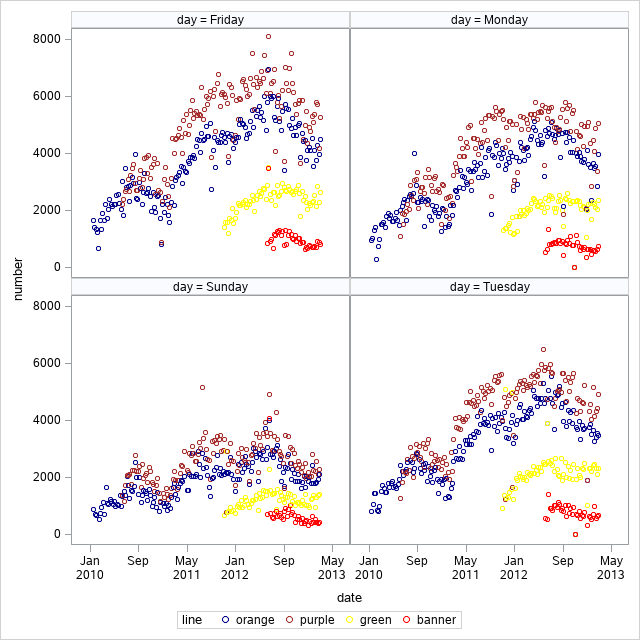

In [76]:
%let working_directory = data; *Replace data with your path to your 
                                directory containing the dataset;

proc import datafile = "&working_directory/Charm_City_Circulator_Ridership.csv" 
    out = circ dbms = csv replace;
    getnames = yes;
    guessingrows = max;
run;

proc sort data = circ;
  by day date daily;
run;

proc transpose data = circ out = long (rename=(_NAME_ = var col1 = number));
  var orangeboardings -- banneraverage;
  by day date daily;
run;

data long2;
  set long;
  var = tranwrd(var, 'Board', '_Board');
  var = tranwrd(var, 'Alight', '_Alight');
  var = tranwrd(var, 'Average', '_Average');
  line = scan(var, 1, '_');
  type = scan(var, 2, '_');
  drop var;
run;

data avg;
  set long2;
  where (type = "Average");
run;

data palette;
  input id $ value $ linecolor $;
  markercolor = linecolor;
  datalines;
lc banner red
lc green yellow
lc orange darkblue
lc purple brown
;
run;

proc sgpanel data = avg dattrmap=palette; 
  where day in ("Monday" "Tuesday" "Friday" "Sunday");
  panelby day;
  scatter Y = number X = date / group = line attrid = lc;
run;

## Basic SAS Programming

1. Submit the following simple SAS program. What does it do?

    ```
    PROC PRINT DATA = sashelp.heart (OBS=10);
    RUN;

    PROC MEANS DATA = sashelp.heart;
      VAR height weight;
    RUN;
    ```

In [9]:
PROC PRINT DATA = sashelp.heart (OBS=10);
RUN;

PROC MEANS DATA = sashelp.heart;
  VAR height weight;
RUN;

This program prints out the first 10 rows of the sashelp.heart dataset and the summary statistics N (sample size), mean, standard deviation, minimum and maxium for the Height and Weight variables.

2. Submit the following small program. How many DATA steps are there? How man PROC steps? Which steps are executed?

    ```
    DATA work.quant;
      SET sashelp.heart; /* Read in from the heart datset */
      KEEP height weight diastolic systolic; *Only keep these variable 
                                          in the new dataset;
    RUN;

    PROC PRINT DATA = work.quant (OBS=10);
    RUN;

    /*
    PROC MEANS DATA = work.quant MIN Q1 Median Q3 MAX MEAN STD;
    RUN;
    */
    ```

In [10]:
DATA work.quant;
  SET sashelp.heart; /* Read in from the heart datset */
  KEEP height weight diastolic systolic; *Only keep these variable 
                                       in the new dataset;
RUN;

PROC PRINT DATA = work.quant (OBS=10);
RUN;

/*
PROC MEANS DATA = work.quant MIN Q1 Median Q3 MAX MEAN STD;
RUN;
*/

There is one DATA step and there are two PROC steps; however, the last PROC MEANS is not run since it is within a paragraph comment.

3. Run PROC CONTENTS on the dataset sashelp.heart. How many observations are in this datset?

In [11]:
PROC CONTENTS data = sashelp.heart;
RUN;

There are 5209 observations (rows) in the dataset.

4. Submit the following program to SAS. What is the value of CurrentDate? (This value represents the number of days since Januar 1, 1960, the reference date for the SAS system).

   ```
   DATA work.date;
      CurrentDate = Today();
   RUN;
   
   PROC PRINT DATA = work.date;
   RUN;
   ```

In [13]:
DATA work.date;
  CurrentDate = Today();
RUN;
   
PROC PRINT DATA = work.date;
RUN;

PROC PRINT DATA = work.date;
   format currentdate mmddyy10.;
RUN;

The value of current date will change depending on when you submit this program. I submitted this program in 10/17/2020 and received the value 22205 or 22205 days since January 1, 1960.

## Data I/O

1. Use PROC IMPORT to read in the Youth Tobacco study, Youth_Tobacco_Survey_YTS_Data.csv and name it youth.

In [14]:
PROC IMPORT datafile = "/folders/myfolders/SAS_Notes/data/Youth_Tobacco_Survey_YTS_Data.csv"
            out = youth dbms = csv replace;
    getnames = yes;
    guessingrows = 500;
RUN;

PROC PRINT data = youth (OBS=5);
RUN;

2. Download an Excel version of the Monuments dataset, Monuments.xlsx, from CANVAS. Use PROC IMPORT to read in the dataset and call the output mon.

In [18]:
PROC IMPORT datafile = "/folders/myfolders/SAS_Notes/data/Monuments.xlsx"
            out = mon dbms = xlsx replace;
    getnames = yes;
RUN;

PROC PRINT data = mon (OBS=5);
RUN;

3. Write a DATA step that will read in the following column formatted data using DATALINES and print the results using PROC PRINT. This dataset contains information on esophageal cancer in Ille-et-Vilaine, France. The variables are

    * Age group
    * Alcohol consumption
    * Tobacco consumption
    * Number of Cases
    * Number of Controls

Write a DATA step to read in the data and print the results. Note: the first line is to help you count the columns. Each number corresponds to a multiple of 5.

```
----1----2----3----4----5----6----7----8
75+ 0-39g/day 0-9g/day      1        18
75+ 0-39g/day    10-19      2         6
75+ 0-39g/day      30+      1         3
75+     40-79 0-9g/day      2         5
75+     40-79    10-19      1         3
75+     40-79    20-29      0         3
75+     40-79      30+      1         1
75+    80-119 0-9g/day      1         1
75+    80-119    10-19      1         1
75+      120+ 0-9g/day      2         2
75+      120+    10-19      1         1
```

In [1]:
DATA eso;
   INPUT aggrp $ 1-3 alc $ 5-13 smoke $ 15-22 ncases 29 ncontrl 38-39;
   DATALINES;
75+ 0-39g/day 0-9g/day      1        18
75+ 0-39g/day    10-19      2         6
75+ 0-39g/day      30+      1         3
75+     40-79 0-9g/day      2         5
75+     40-79    10-19      1         3
75+     40-79    20-29      0         3
75+     40-79      30+      1         1
75+    80-119 0-9g/day      1         1
75+    80-119    10-19      1         1
75+      120+ 0-9g/day      2         2
75+      120+    10-19      1         1
;
RUN;

PROC PRINT DATA=eso;
RUN;

SAS Connection established. Subprocess id is 2198



## SAS Variables and Assignment Statements

1. Use the following SAS data step to create the new variables `Grade` and `Course` defined below:

```
data school;    
   input Age Quiz : $1. Midterm Final;
   /* Add you statements here */
datalines;
12 A 92 95
12 B 88 88
13 C 78 75
13 A 92 93
12 F 55 62
13 B 88 82
;
```

Using If-Then-Else statements, compute two new variables as follows: 

* Grade (numeric), with a value of 6 if Age is 12 and a value of 8 if Age is 13.
* The quiz grades have numerical equivalents as follows: A = 95, B = 85, C = 75, D = 70, and F = 65. Using this information, compute a course grade (Course) as a weighted average of the Quiz (20\%), Midterm (30\%) and Final (50\%).

In [20]:
data school;
   input Age Quiz : $1. Midterm Final;
   IF Age = 12 THEN Grade = 6;
   ELSE IF AGE = 13 THEN Grade = 8;
   IF quiz = "A" THEN Course = 0.2*95 + 0.3*midterm + 0.5*final;
   ELSE IF quiz = "B" THEN Course = 0.2*85 + 0.3*midterm + 0.5*final;
   ELSE IF quiz = "C" THEN Course = 0.2*75 + 0.3*midterm + 0.5*final;
   ELSE IF quiz = "D" THEN Course = 0.2*70 + 0.3*midterm + 0.5*final;
   ELSE IF quiz = "F" THEN Course = 0.2*65 + 0.3*midterm + 0.5*final;
datalines;
12 A 92 95
12 B 88 88
13 C 78 75
13 A 92 93
12 F 55 62
13 B 88 82
;
RUN;

PROC PRINT DATA = school;
RUN;

## Working with Your Data

1. Create a temporary SAS dataset called `heart` from the sashelp.heart dataset. The library sashelp if a permanent library that comes with SAS.

In [30]:
DATA heart;
  SET sashelp.heart;
RUN;

2. View the description of the `heart` dataset by running PROC CONTENTS. How many observations (rows) and variables (columns) are in the dataset?

In [25]:
PROC CONTENTS DATA = heart;
RUN;

There are 5209 observations (rows) and 17 variables (columns).

3. Use the RENAME= option to rename `Status` to `condition`. Show the variables table from PROC CONTENTS to see that the name has changed.

In [31]:
DATA heart2 (RENAME = (status = condition));
   SET heart;
RUN;

PROC CONTENTS data = heart2;
RUN;

4. Create a subset of `heart` called `heart_sub` that contains only the columns `height`, `weight`, and `diastolic`. What are the dimensions of `heart_sub`? Print the first five rows of `heart_sub`.

In [32]:
DATA heart_sub;
   SET heart;
   KEEP height weight diastolic;
RUN;

PROC CONTENTS data = heart_sub;
RUN;

PROC PRINT data = heart_sub(OBS=5);
RUN;

The new dataset `heart_sub` contains 5209 rows and 3 columns.

5. Subset the patients (rows) of `heart` that have a diastolic blood pressure (diastolic) more than 90 into a dataset called `heart_sub2`. How many are there? Print the first five rows of `heart_sub2`.

In [33]:
DATA heart_sub2;
   SET heart;
   WHERE diastolic > 90;
RUN;

PROC CONTENTS data = heart_sub2;
RUN;

PROC PRINT data = heart_sub2(OBS=5);
RUN;

There are 1366 patients with a diastolic blood pressure above 90.

6. Subset the patients (rows) of `heart` that have a diastolic blood pressure less than or equal to 90 and have a weight more than 180 pounds into a dataset called `heart_sub3`. How many are there? Print the first five rows of `heart_sub3`.

In [34]:
DATA heart_sub3;
   SET heart;
   WHERE diastolic <= 90 AND weight > 180;
RUN;

PROC CONTENTS data = heart_sub3;
RUN;

PROC PRINT data = heart_sub3(OBS=5);
RUN;

There are 481 patients with a diastolic blood pressure less than or equal to 90 and with a weight above 180 pounds.

7. Create a subset of `heart` that only contains the columns `weight`, `systolic`, and `cholesterol` for those that are heavy smokers smoker (Smoking_Status = "Heavy (16-25)"). Save this to `heart_sub`. What are the dimensions of the dataset? Print the first five rows of `heart_sub`.

In [35]:
DATA heart_sub;
   SET heart;
   WHERE Smoking_Status = "Heavy (16-25)";
   KEEP weight systolic cholesterol;
RUN;

PROC CONTENTS data = heart_sub;
RUN;

PROC PRINT data = heart_sub(OBS=5);
RUN;

The new heart_sub dataset contains 1046 rows and three columns.

8. Reorder the rows of `heart_sub` in decreasing order by cholesterol. Print the first 5 rows of the sorted dataset.

In [38]:
PROC SORT data = heart_sub out = heart_sub_srt;
  BY descending cholesterol;
RUN;

PROC PRINT data = heart_sub_srt(OBS=5);
RUN;

## Data Summarization

1. How many bike lanes are currently in Baltimore? You can assume that each observation/row is a different bike lane.

In [39]:
PROC IMPORT datafile="/folders/myfolders/SAS_Notes/data/Bike_Lanes.csv"
            out = bike dbms = csv replace;
    getnames = yes;
    guessingrows = max;
RUN;

PROC CONTENTS data = bike;
RUN;

There are 1631 rows.

2. How many (a) feet and (b) miles of total bike lanes are currently in Baltimore? (The length variable provides the length in feet.)

In [40]:
PROC MEANS data = bike sum;
   VAR length;
RUN;

In [41]:
DATA miles;
   length_mi = 439447.59 / 5280;
RUN;

PROC PRINT data = miles;
RUN;

3. How many types (type) bike lanes are there? Which type (a) occurs the most and (b) has the longest average bike lane length?

In [43]:
PROC FREQ data = bike;
  TABLE type;
RUN;

PROC MEANS data = bike noprint;
   CLASS type;
   VAR length;
   OUTPUT out = type_mean mean = length_mean;
RUN;

PROC SORT data = type_mean;
  BY descending length_mean;
RUN;

PROC PRINT DATA = type_mean;
RUN;

There are 7 bike lane types (8 if you include missing as a category). The lane type that occurrs the most often is bike lane with a count of 621. The lane type sidepath has the longest average length at 665.88 ft. 

4. How many different projects (project) do the bike lanes fall into? Which project category has the longest average bike lane length?

In [44]:
PROC FREQ data = bike;
  TABLE project;
RUN;

PROC MEANS data = bike noprint;
   CLASS project;
   VAR length;
   OUTPUT out = project_mean mean = length_mean;
RUN;

PROC SORT data = project_mean;
  BY descending length_mean;
RUN;

PROC PRINT DATA = project_mean;
RUN;

There are 12 project types (13 if you include missing as a project type). The maintenance project has the longest average bike lane length at 1942.15 ft.

5. What was the average bike lane length per year that they were installed? (Be sure to first set dateInstalled to . if it is equal to zero.)

In [45]:
DATA bike;
   SET bike;
   IF dateinstalled = 0 THEN dateinstalled = .;
RUN;

PROC MEANS data = bike mean;
  CLASS dateinstalled;
  VAR length;
RUN;

6. (a) Numerically and (b) graphically describe the distribution of bike lane lengths (length).


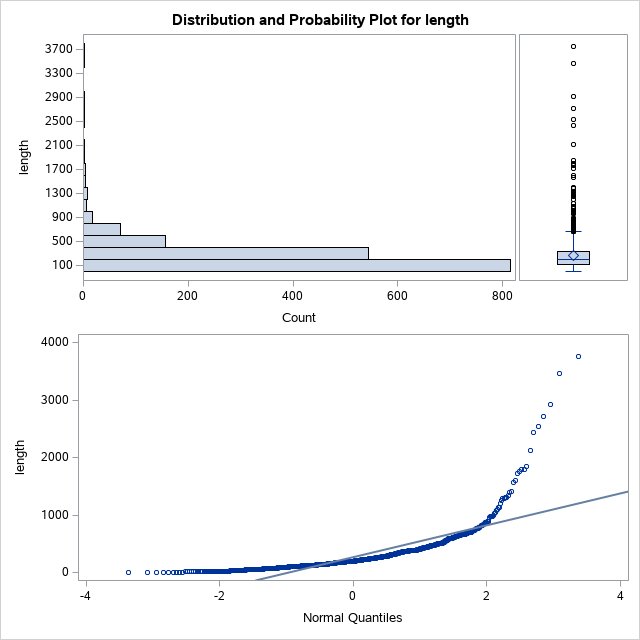

In [47]:
PROC UNIVARIATE data = bike plots;
  VAR length;
RUN;

7. Describe the distribution of bike lane lengths numerically and graphically after stratifying them by (a) type and then by (b) number of lanes (numLanes).


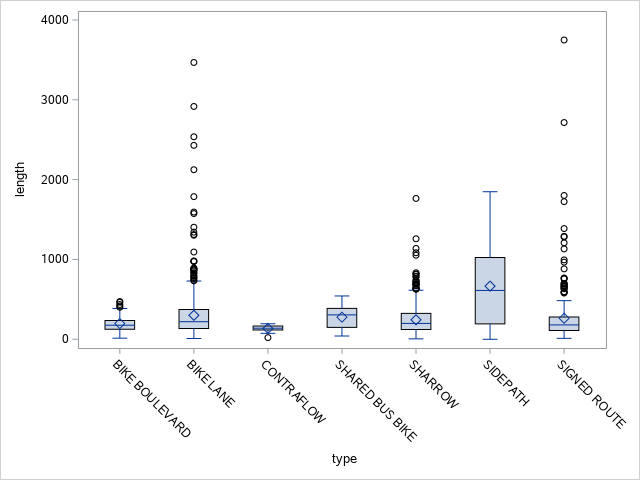
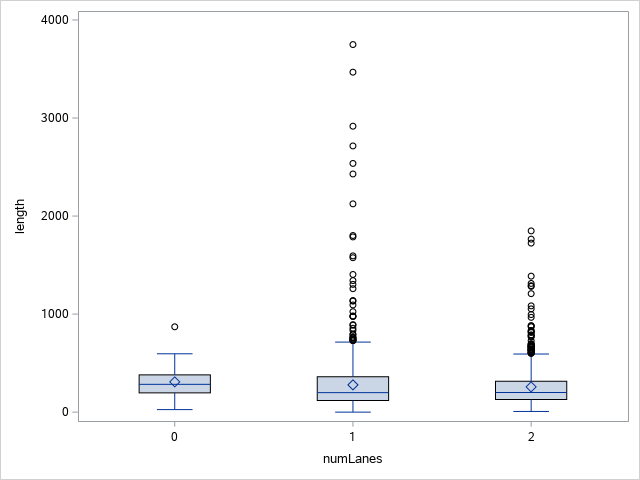

In [49]:
PROC MEANS data=bike mean std;
   CLASS type;
   VAR length;
RUN;

PROC SGPLOT data = bike;
   VBOX length / category = type;
RUN;

PROC MEANS data=bike mean std;
   CLASS numlanes;
   VAR length;
RUN;

PROC SGPLOT data = bike;
   VBOX length / category = numlanes;
RUN;

## SAS Formats and Dates

1. Use proc freq to make a table of the different bike lane types.

In [50]:
PROC IMPORT datafile="/folders/myfolders/SAS_Notes/data/Bike_Lanes.csv"
            out = bike dbms = csv replace;
    getnames = yes;
    guessingrows = max;
RUN;

PROC FREQ data = bike;
   TABLE type;
RUN;

2. Create a format that changes changes the bike lane types by mapping "SIDEPATH", "BIKE BOULEVARD", and "BIKE LANE" to itself but does not provide a value for the other types. Apply this format to type and make a table of type using PROC FREQ. What happens to the other bike lane types?

In [57]:
PROC FORMAT;
   VALUE $typefmt "SIDEPATH" = "SIDEPATH"
                   "BIKE BOULEVARD" = "BIKE BOULEVARD"
                   "BIKE LANE" = "BIKE LANE"
                   OTHER = " ";
RUN;

DATA bike2;
  SET bike;
  FORMAT type $typefmt.;
RUN;

PROC FREQ data = bike2;
   TABLE type;
RUN;

We have translated all but BIKE BOULEVARD, BIKE LANE, and SIDEPATE to missing, so we only get these three listed as categories in the table.

3. Create a format that changes the bike lane types to be "CONTRAFLOW", "SHARED BUS BIKE", "SHARROW", "SIGNED ROUTE", or "OTHER" if the lane type is anything else.

In [60]:
PROC FORMAT;
   VALUE $type2fmt "CONTRAFLOW" = "CONTRAFLOW"
                   "SHARED BUS BIKE" = "SHARED BUS BIKE"
                   "SHARROW" = "SHARROW"
                   "SIGNED ROUTE" = "SIGNED ROUTE"
                   "SIDEPATH", "BIKE BOULEVARD", "BIKE LANE" = "OTHER";
RUN;

DATA bike3;
  SET bike;
  FORMAT type $type2fmt.;
RUN;

PROC FREQ data = bike3;
   TABLE type;
RUN;

4. Write a datatep that can be used to read in the following small dataset with three dates and one time. Then print the dataset using readable date formats.

```
DATA temp; 
  INPUT date1 /*informat1*/ +1 date2 /*informat2*/ +1
        date3 /*informat3*/ @32 time /*informat4*/;
  DATALINES;
2014/02/14 06Jan2018 4/5/2016   03:2:22
;
RUN;
```

In [62]:
DATA temp;
INPUT date1 yymmdd10. +1 date2 DATE9. +1
     date3 mmddyy8. @32 time time7.;
DATALINES;
2014/02/14 06Jan2018 4/5/2016   03:2:22
;
RUN;

PROC PRINT data = temp;
  FORMAT date1 date2 date3 mmddyy10. time time7.;
RUN;

## Character Functions

1. Read in the Baltimore city employee salaries dataset, Baltimore_City_Employee_Salaries_FY2015.csv, using PROC IMPORT.

In [64]:
PROC IMPORT datafile = "/folders/myfolders/SAS_Notes/data/Baltimore_City_Employee_Salaries_FY2015.csv"
            out = sal dbms = csv replace;
    getnames = yes;
    guessingrows = max;
RUN;

PROC PRINT data = sal(OBS=5);
RUN;

2. Make a temporary SAS dataset called `health_sal` using the salaries dataset, with only the agencies (`JobTitle`) of those with "fire" (anywhere in the job title), if any, in the name. Be sure to ignore case in the string matching for 'fire'.

In [68]:
DATA health_sal;
    SET sal;
    WHERE index(lowcase(JobTitle), 'fire') > 0;
RUN;

PROC PRINT data=health_sal(OBS=5);
    VAR JobTitle;
RUN;

3. Make a temporary data set called `trans` which contains only agencies that contain “TRANS” (case sensitive).

In [69]:
DATA trans;
    SET sal;
    WHERE index(JobTitle, 'TRANS') > 0;
RUN;

PROC PRINT data=trans(OBS=5);
    VAR JobTitle;
RUN;

4. What is/are the profession(s) of people who have “abra” in their name for Baltimore’s Salaries? Case should be ignored.

In [71]:
PROC PRINT data=sal;
    VAR name JobTitle;
    WHERE index(lowcase(name), 'abra') > 0;
RUN;

5. Create a subset of the salaries dataset that only includes the Police Department, Fire Department and Sheriff’s Office. Use the Agency variable with (case sensitive) string matching. Call this `emer`. How many employees are in this new dataset?

In [74]:
DATA emer;
   SET sal;
   WHERE index(agency, "Sheriff's Office") > 0 OR
         index(agency, "Police Department") > 0 OR
         index(agency, "Fire Department") > 0;
RUN;

PROC PRINT data=emer(OBS=5);
   VAR agency;
RUN;

6. Create a variable called `dept` in the `emer` data set by extracting the the part of the `Agency` variable up until 'ment' or 'ice'. E.g. we want to extract all characters up until ment or ice (we can group in regex using parentheses) and then discard the rest. Use:

```
re = prxparse('/.*(ment|ice)/');
call prxsubstr(re, Agency, pos, len);
dept = substr(Agency, pos, len);
```

In [75]:
DATA emer;
   SET emer;
   re = prxparse('/.*(ment|ice)/');
   call prxsubstr(re, Agency, pos, len);
   dept = substr(Agency, pos, len);
RUN;

PROC FREQ data = emer;
   TABLE dept;
RUN;

## Data Cleaning

1. Read in the bike lanes dataset Bike_Lanes.csv using PROC IMPORT and call it bike.

In [78]:
PROC IMPORT datafile="/folders/myfolders/SAS_Notes/data/Bike_Lanes.csv"
            out = bike dbms = csv replace;
    getnames = yes;
    guessingrows = max;
RUN;

PROC PRINT DATA = bike(OBS=5);
RUN;

2. How many rows are are in the bike dataset? How many are complete cases? Hint: Use cmiss(of _ALL_) in a dataset to create a 0/1 variable to indicate if it complete or not and then use PROC MEANS to sum this 0/1 variable.

In [79]:
PROC CONTENTS data = bike;
RUN;

There are 1631 rows in the bike data set.

In [87]:
DATA bike;
  SET bike;
  IF cmiss(of _ALL_) > 0 THEN complete = 0;
  ELSE complete = 1;
RUN;

PROC PRINT data = bike(OBS=5);
RUN;

PROC MEANS data = bike sum;
   VAR complete;
RUN;

3. Filter rows of bike that are NOT missing the `route` variable, assign this to the object `have_route`. Create a frequency table of the `subType` variable using PROC FREQ, including the missing `subType`s.

In [90]:
DATA have_route;
   SET bike;
   WHERE NOT MISSING(route);
RUN;

PROC FREQ data = have_route;
   TABLE subType / missing;
RUN;

## Data Manipulation

1. Read in the Bike_Lanes_Wide.csv dataset and call is `wide` using PROC IMPORT. Print the first few rows of the dataset.

In [97]:
PROC IMPORT datafile="/folders/myfolders/SAS_Notes/data/Bike_Lanes_Wide.csv"
            out = wide dbms = csv replace;
    getnames = yes;
    guessingrows = max;
RUN;

PROC CONTENTS data = wide;
RUN;

PROC PRINT DATA = wide(OBS=5);
RUN;

2. Reshape `wide` using either PROC TRANSPOSE or a DATA step. You will need to gather all columns except the name column. Transform into a long dataset with two new columns `lanetype` (the former column names) and `the_length` the data values. In the variable `the_length`, replace 'NA' values with . and convert it to a numeric column.

In [107]:
DATA long;
   SET wide;
   array col{*} 'BIKE BOULEVARD'n -- NA;
   DO i = 1 TO dim(col);
      lanetype = vname(col(i));
      IF col(i) = 'NA' THEN the_length = .;
      ELSE the_length = INPUT(col(i), 20.7);
      OUTPUT;
   END;
   DROP 'BIKE BOULEVARD'n -- NA i;
RUN;

PROC PRINT data = long(obs=10);
   TITLE 'Using a DATA step';
RUN;

PROC SORT data=wide;
   BY name;
RUN;

PROC TRANSPOSE data = wide
               out = long2 (RENAME = (COL1 = the_length 
                                      _NAME_ = lanetype));
   BY name;
   VAR 'BIKE BOULEVARD'n -- NA;
RUN;

DATA long2;
   SET long2(RENAME = (the_length = length));
   IF length = 'NA' THEN the_length = .;
   ELSE the_length = INPUT(length, 20.7);
   DROP length;
RUN;

PROC PRINT data = long2(OBS=10);
   TITLE 'Using PROC TRANSPOSE';
RUN;

TITLE;

3. Read in the roads and crashes .csv files and call them `road` and `crash`.

In [108]:
PROC IMPORT datafile="/folders/myfolders/SAS_Notes/data/roads.csv"
            out = road dbms = csv replace;
    getnames = yes;
    guessingrows = max;
RUN;

PROC IMPORT datafile="/folders/myfolders/SAS_Notes/data/crashes.csv"
            out = crash dbms = csv replace;
    getnames = yes;
    guessingrows = max;
RUN;

PROC PRINT data = road;
RUN;

PROC PRINT data = crash(OBS=10);
RUN;

4. Replace (using `tranwrd`) any hyphens (`-`) with a space in `Road` variable of `crash`. Call this data `crash2`. Table the `Road` variable with PROC FREQ.

In [109]:
DATA crash2;
   SET crash;
   road = tranwrd(road, '-', ' ');
RUN;

PROC FREQ data = crash2;
   TABLE road;
RUN;

5. How many observations are in each of the `crash` and `road` datasets?

In [110]:
PROC CONTENTS data = crash;
RUN;

PROC CONTENTS data = road;
RUN;

The crash dataset has 110 observations and the road datset has 5.

6. Separate the `Road` column (using `scan`) into (`type` and `number`) in `crash2`. Reassign this to `crash2`. Table `type` from `crash2` using PROC FREQ. Then create a new variable calling it `road_hyphen` using one of the concatenate functions (such as CAT). Unite the `type` and `number` columns using a hyphen (`-`) and then table `road_hyphen` using PROC FREQ.

In [111]:
DATA crash2;
   SET crash2;
   type = scan(road, 1);
   number = scan(road, 2);
RUN;

PROC FREQ data=crash2;
   TABLE type;
RUN;

DATA crash2;
   SET crash2;
   road_hyphen = CATX('-', type, number);
RUN;

PROC FREQ data=crash2;
   TABLE road_hyphen;
RUN;


7. Which and how many years were data collected in the `crash` dataset?

In [112]:
PROC FREQ data=crash;
   TABLE year;
RUN;

The crash dataset contains data on the years from 1991 to 2012 for a total of 22 years.

8. Read in the dataset Bike_Lanes.csv and call it `bike`.

In [113]:
PROC IMPORT datafile="/folders/myfolders/SAS_Notes/data/Bike_Lanes.csv"
            out = bike dbms = csv replace;
    getnames = yes;
    guessingrows = max;
RUN;

PROC PRINT data=bike(obs=5);
RUN;

9. Keep rows where the record is not missing `type` and not missing `name` and re-assign the output to `bike`.

In [114]:
DATA bike;
   SET bike;
   WHERE NOT MISSING(type);
RUN;

PROC PRINT data=bike(obs=5);
RUN;

10. Using PROC MEANS with a BY statement grouping `name` and `type` (i.e for each type within each name), find the `sum` of the `length`. Use an OUTPUT statement to get this summary dataset and only keep the `name`, `type` and sum of the `length` column (after renaming this column `length`). Call this data set `sub`.

In [117]:
PROC SORT data = bike;
  BY name type;
RUN;

PROC MEANS data = bike noprint;
  BY name type;
  OUTPUT out=sub sum=length;
RUN;

DATA sub;
   SET sub;
   keep name type length;
RUN;

PROC PRINT data=sub(obs=8);
RUN;

In [118]:
PROC FREQ data=sub;
   TABLE type;
RUN;

11. Reshape `sub` from long to wide by taking the `type` to be the new columns and `length` to be the value in those columns. (NOTE: the `names` have spaces in them. Do we need to replace the spaces with a character before changing them to column names?)

In [139]:
DATA new_wide;
   SET sub;
   BY name;
   RETAIN BIKE_BOULEVARD BIKE_LANE CONTRAFLOW SHARED_BUS_BIKE 
          SHARROW SIDEPATH SIGNED_ROUTE;
   array atype (*) BIKE_BOULEVARD BIKE_LANE CONTRAFLOW SHARED_BUS_BIKE 
                   SHARROW SIDEPATH SIGNED_ROUTE;
                   
   IF first.name THEN call missing(of atype(*));
   
   IF type = 'BIKE BOULEVARD' THEN atype(1) = length;
   ELSE IF type = 'BIKE LANE' THEN atype(2) = length;
   ELSE IF type = 'CONTRAFLOW' THEN atype(3) = length;
   ELSE IF type = 'SHARED BUS BIKE' THEN atype(4) = length;
   ELSE IF type = 'SHARROW' THEN atype(5) = length;
   ELSE IF type = 'SIDEPATH' THEN atype(6) = length;
   ELSE IF type = 'SIGNED ROUTE' THEN atype(7) = length;
   
   IF last.name THEN OUTPUT;
   DROP type length;
RUN;

PROC PRINT data=new_wide(OBS=5);
   TITLE 'Wide Dataset Using DATA Step';
RUN;

PROC TRANSPOSE data = sub out = new_wide2(drop=_NAME_);
   BY name;
   VAR length;
   ID type;
RUN;

PROC PRINT data = new_wide2(OBS=5);
   TITLE 'Wide Dataset Using PROC TRANSPOSE';
RUN;

TITLE ;

12. Join data in the crash and road datasets to retain only complete data, (using an inner join on road) Merge by the variable `Road`. Call the output merged. How many observations are there?

In [141]:
PROC SORT data = road;
  BY road;
RUN;

PROC SORT data = crash;
  BY road;
RUN;

DATA merged;
  MERGE road (IN = in1) 
        crash (IN = in2);
  BY road;
  IF in1 = 1 and in2 = 1;
RUN;

PROC CONTENTS data = merged;
RUN;

There are 88 rows.

13. Join data using a `full_join`. Call the output `full`. How many observations are there?

In [143]:
DATA full_join;
  MERGE road crash;
  BY road;
RUN;

PROC PRINT data = full_join(OBS=10);
RUN;

14. Do a left join of the `road` and `crash`. ORDER matters here! How many observations are there?

In [144]:
DATA left_join;
   MERGE road (in = in1) crash;
   BY road;
   IF in1 = 1;
RUN;

PROC CONTENTS data = left_join;
RUN;

There are 89 rows.

15. Repeat above with a `right_join` with the same order of the arguments. How many observations are there?

In [145]:
DATA right_join;
   MERGE road crash (in = in1);
   BY road;
   IF in1 = 1;
RUN;

PROC CONTENTS data = right_join;
RUN;

There are 110 observations in the right joined dataset.

## The Output Delivery System and Graphics

In [146]:
PROC IMPORT datafile = "/folders/myfolders/SAS_Notes/data/Charm_City_Circulator_Ridership.csv"
            out = circ dbms = csv replace;
    getnames = yes;
    guessingrows = max;
RUN;

DATA long;
   SET circ;
   ARRAY larray(*) orangeBoardings -- bannerAverage;
   DO i = 1 TO dim(larray);
      var = vname(larray(i));
      number = larray(i);
      var = tranwrd(var, 'Board', ' Board');
      var = tranwrd(var, 'Alight', ' Alight');
      var = tranwrd(var, 'Average', ' Average');
      route = scan(var, 1);
      type = scan(var, 2);
      OUTPUT;
    END;
    
    DROP i var orangeBoardings -- bannerAverage;
RUN;

DATA avg;
  SET long;
  WHERE type = 'Average' and number ne .;
RUN;

PROC PRINT data = long(obs = 10);
RUN;

PROC PRINT data = avg(obs=10);
RUN;

1. Plot average ridership (avg data set) by date using a scatterplot.
   a. Color the points by route (orange, purple, green, banner)
   b. Add black smoothed curves for each route
   c. Color the points by day of the week


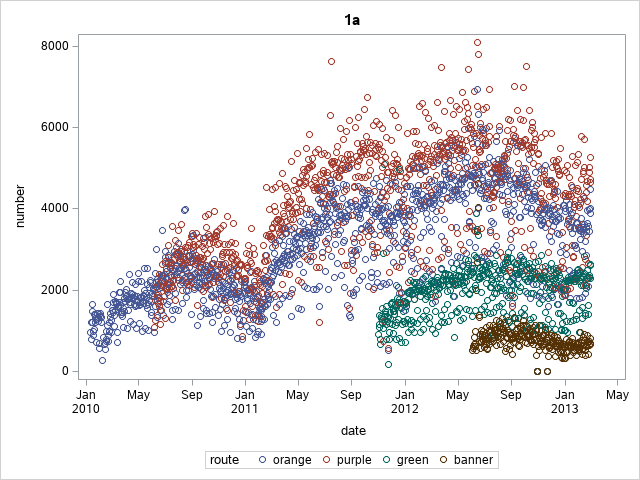
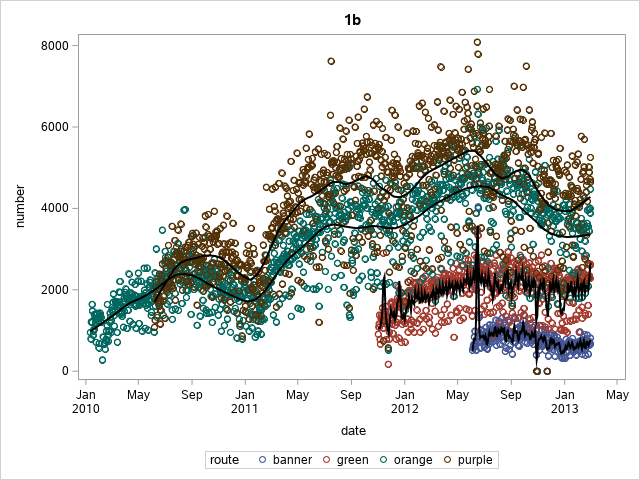
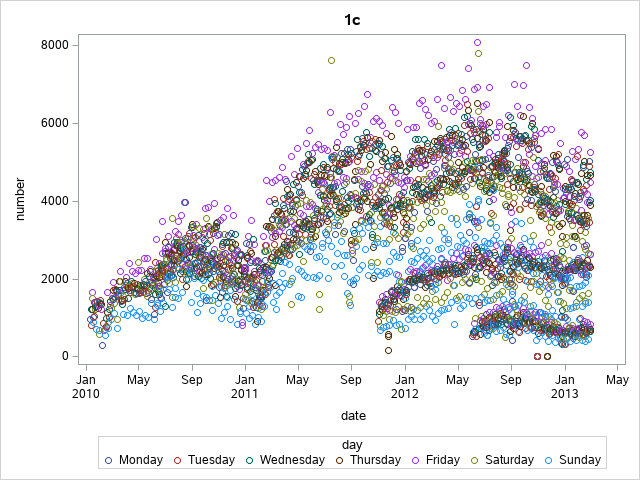

In [147]:
PROC SGPLOT data = avg;
   TITLE '1a';
   SCATTER Y = number X = date / group = route;
RUN;

PROC SGPLOT data = avg;
   TITLE '1b';
   SCATTER Y = number X = date / group = route;
   LOESS Y = number X = date / group = route lineattrs=(color = black);
RUN;

PROC SGPLOT data = avg;
   TITLE '1c';
   SCATTER Y = number X = date / group = day;
RUN;

2. Replot 1a where the colors of the points are the name of the route (with banner –> blue). Note: you will need to make a data attribute map.


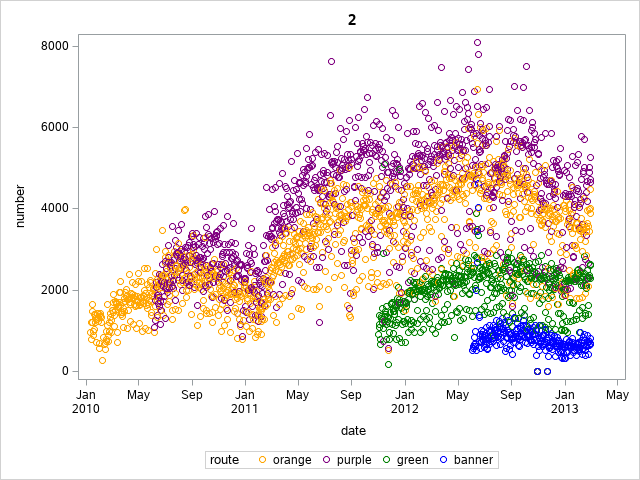

In [151]:
DATA marker_map;
  INPUT id $2. +1 VALUE $6. +1 MARKERCOLOR $6.;
DATALINES;
mc banner blue
mc green  green
mc orange orange
mc purple purple
;
RUN;

PROC SGPLOT data = avg dattrmap = marker_map;
   TITLE '2';
   SCATTER Y = number X = date / group = route attrid = mc;
RUN;

3. Plot a scatterplot of average ridership by date with one panel per route.


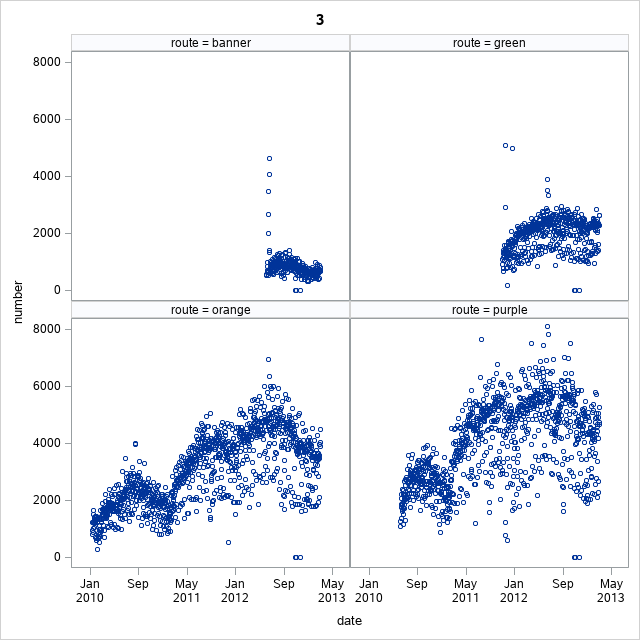

In [162]:
PROC SGPANEL data = avg;
   TITLE '3';
   PANELBY route;
   SCATTER Y = number X = date;
RUN;

4. Plot a scatterplpot of average ridership by date with separate panels by day of the week, colored by route.


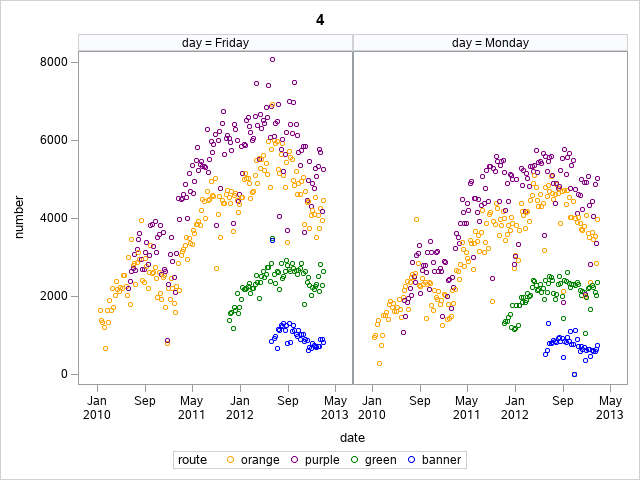
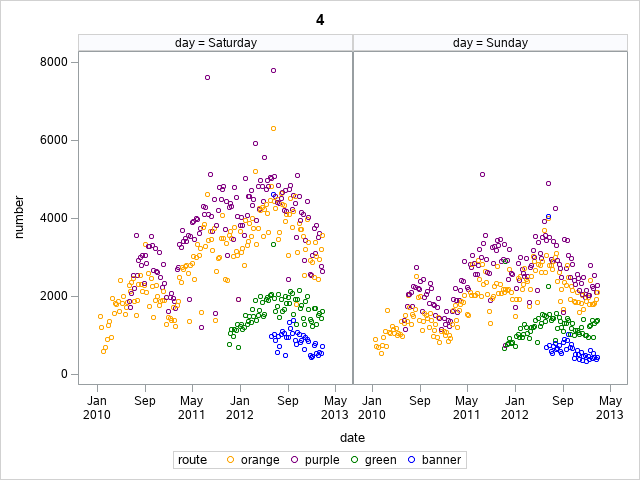
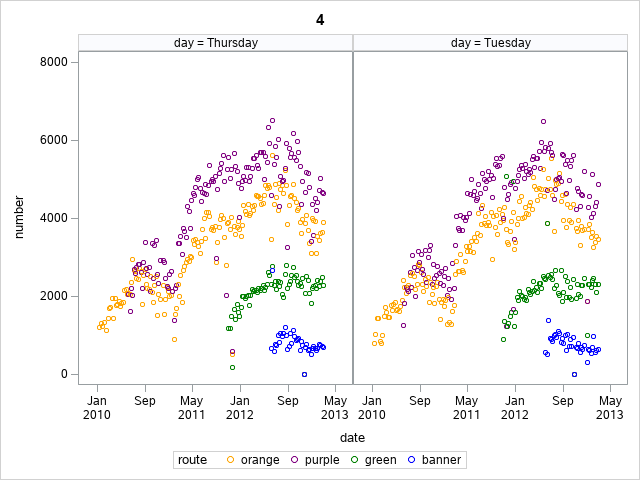
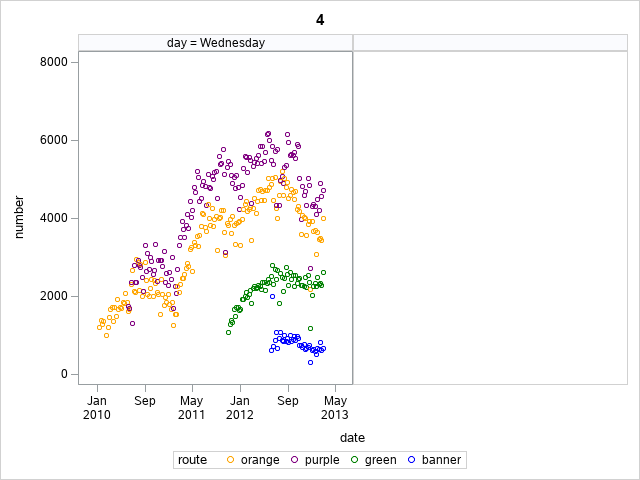

In [165]:
*Default colors are fine here to, but we can also use a data attribute map like we did before;
PROC SGPANEL data = avg dattrmap = marker_map;
   TITLE '4';
   PANELBY day;
   SCATTER Y = number X = date / group = route attrid = mc;
RUN;

5. Plot a scatterplot of average ridership (avg) by date, colored by route (same as 1a). (do not take an average, use the average column for each route). Make the x-label "Year". Make the y-label "Number of People".


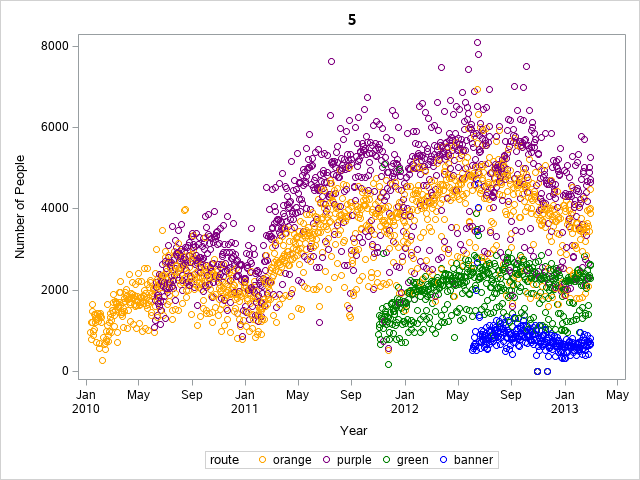

In [166]:
PROC SGPLOT data = avg dattrmap = marker_map;
   TITLE '5';
   SCATTER Y = number X = date / group = route attrid = mc;
   XAXIS LABEL = "Year";
   YAXIS LABEL = "Number of People";
RUN;

6. Plot average ridership on the orange route versus date as a solid line, and add dashed “error” lines based on the boardings and alightings. The line colors should be orange.


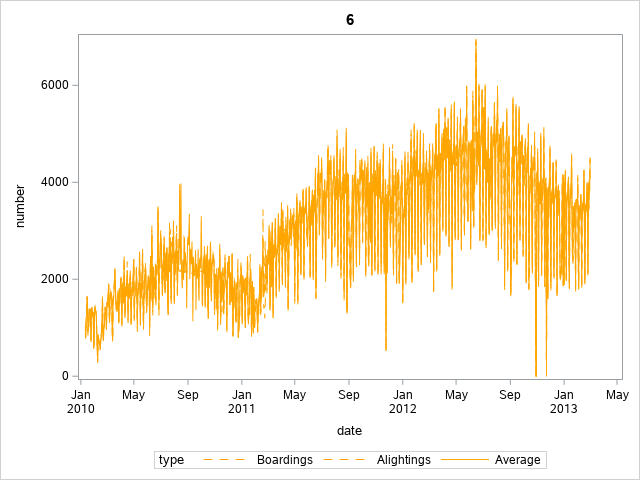

In [179]:
DATA orange;
  SET long;
  WHERE route = "orange";
RUN;

DATA line_map;
  INPUT id $2. +1 VALUE $10. +1 linepattern $5.;
DATALINES;
lp Alightings dash
lp Average    solid
lp Boardings  dash
;
RUN;

PROC SGPLOT data = orange dattrmap = line_map;
  TITLE '6';
  SERIES Y = number X = date / group = type attrid = lp lineattrs=(color = orange);
RUN;

TITLE;

## Statistical Analysis in SAS

In [ ]:
FILENAME cardata '/folders/myfolders/SAS_Notes/data/kaggleCarAuction.csv';

PROC IMPORT datafile = cardata out = cars dbms = CSV replace;
   getnames = yes;
   guessingrows = 1000;
RUN;

FILENAME mortdat '/folders/myfolders/SAS_Notes/data/indicatordeadkids35.csv';

PROC IMPORT datafile = mortdat out = mort dbms = CSV replace;
   getnames = yes;
   guessingrows = 500;
RUN;

1. Compute the correlation between the `1980`, `1990`, `2000`, and `2010` mortality data. Just display the result to the screen. Then compute using the NOMMISS option. (Note: The column names are numbers, which are invalid standard SAS names, so to refer to the variable 1980 in your code use '1980'n.)

In [180]:
PROC CORR data = mort;
   VAR '1980'n '1990'n '2000'n '2010'n;
RUN;

PROC CORR data = mort nomiss;
   VAR '1980'n '1990'n '2000'n '2010'n;
RUN;

2. 
   a. Compute the correlation between the `Myanmar`, `China`, and `United States` mortality data. Store this correlation matrix in an object called `country_cor` using ODS OUTPUT.
   b. Extract the Myanmar-US correlation from the correlation matrix.

In [182]:
DATA mort_sub;
   SET mort(RENAME=(Var1 = Country));
   WHERE country in ('Myanmar' 'China' 'United States');
RUN;

PROC TRANSPOSE data = mort_sub out = mort_sub_transposed;
   VAR '1760'n -- '2099'n;
   ID country;
RUN;

PROC CORR DATA = mort_sub_transposed;
   VAR China Myanmar 'United States'n;
   ODS OUTPUT PearsonCorr = country_cor;
RUN;

PROC PRINT data = country_cor;
   Var Myanmar;
   WHERE Variable = 'United States';
RUN;
   

3. Is there a difference between mortality information from `1990` and `2000`? Run a paired t-test and a Wilcoxon signed rank test to assess this. Hint: to extract the column of information for `1990`, use '1990'n.


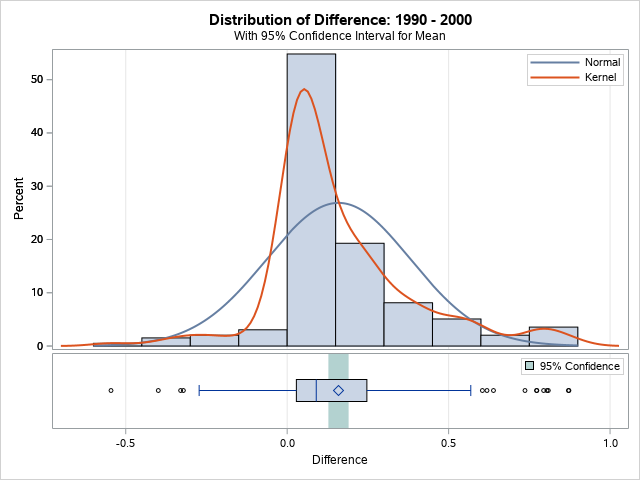
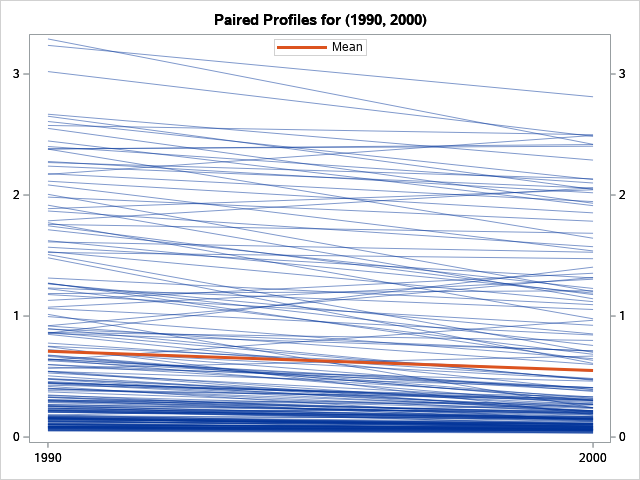
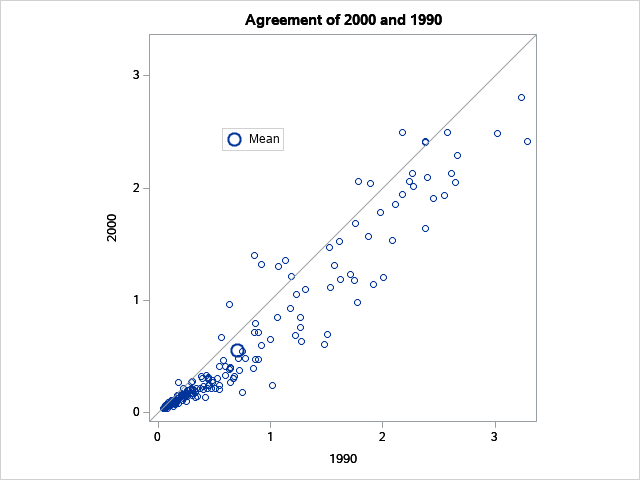
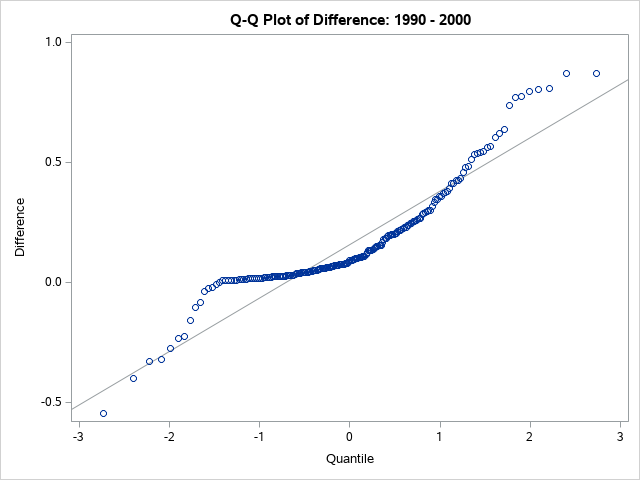

In [185]:
PROC TTEST data = mort;
   PAIRED '1990'n*'2000'n;
RUN;

DATA diff;
   SET mort;
   diff = '2000'n - '1990'n;
RUN;

PROC UNIVARIATE data = diff;
  VAR diff;
RUN;

4. Using the cars dataset, fit a linear regression model with vehicle cost (`VehBCost`) as the outcome and vehicle age (`VehicleAge`) and whether it's an online sale (`IsOnlineSale`) as predictors as well as their interaction.

In [186]:
PROC GLM data = cars;
   MODEL VehBCost = VehicleAge IsOnlineSale VehicleAge*IsOnlineSale;
RUN;

5. Create a variable called `expensive` in the `cars` data that indicates if the 
vehicle cost is over `$10,000`. Use a chi-squared test to assess if there is a
relationship between a car being expensive and it being labeled as a "bad buy" (`IsBadBuy`).

In [187]:
DATA cars;
  SET cars;
  IF VehBCost > 10000 THEN expensive = 1;
  ELSE expensive = 0;
RUN;

PROC FREQ data = cars;
   TABLES expensive*IsBadBuy / chisq;
RUN;

6. Fit a logistic regression model where the outcome is "bad buy" status and predictors are the `expensive` status and vehicle age (`VehicleAge`). Request confidence intervals for the odds ratios.


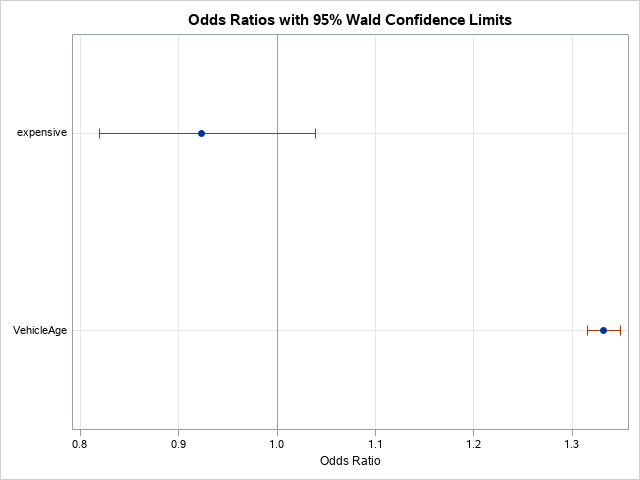

In [188]:
PROC LOGISTIC data = cars;
   MODEL IsBadBuy(event='1') = expensive VehicleAge / CLODDS = WALD;
RUN;

## Macros

1. Write a macro that discretizes a quantitative variable into four categories based on quantiles. That is:

    * if X < Q1 then group = 1
    * if Q1 < X < M then group = 2
    * if M < X < Q3 then group = 3
    * if Q3 < X then group = 4

The macro should have the following defnition - %quartilesmacro(mydata, qvar, round, out);

* mydata: dataset containing the quantitative variable
* qvar: name of quantitative variable
* round: integer representing number of decimal places to round to
* out: name of output dataset which contains the categorized variable

We will explore this by using the Framingham dataset as an example to apply the macro to.

In [189]:
LIBNAME phc6089 "/folders/myfolders/SAS_Notes/data/";

*Create a temporary data set, so that we don't save changes to the original data set.;
DATA fghmTemp;
   SET phc6089.fghm113;
RUN;

/*Now let's code some variables with some more descriptive values.
  SEX (Gender): 1=Men 
				2=Women
  Period (Examination cycle): 1=Period1 
							  2=Period2
							  3=Period3
  BPMEDS (Use of anti-hypertensive meds): 0=Not currently
										  1=Currently use
  CURSMOKE (Currently smoke?): 0=No
							   1=Yes
  DIABETES: 0=Not diabetic
			1=Diabetic
  PREVAP (Have angina pectoric?): 0=No
								  1=Yes
  PREVCHD (Coronary heart disease?): 0=No
									 1=Yes
  PREVMI (Myocardial infarction?): 0=No
								   1=Yes
  PREVSTRK (Had a stroke?): 0=No
				   			1=Yes
  PREVHYP (Hypertensive? sys bp >=140 or dyas bp >= 90): 0=no
														 1=yes
*/

PROC FORMAT;
VALUE YNfmt 0="No"
			1="Yes";
VALUE perfmt 1="Period 1"
			 2="Period 2"
			 3="Period 3";
VALUE gndrfmt 1="Men"
			  2="Women";
RUN;

DATA fghmtemp;
SET fghmtemp;
FORMAT prevap ynfmt.
	   diabetes ynfmt.
	   cursmoke ynfmt.
	   bpmeds ynfmt.
	   prevchd ynfmt.
	   prevmi ynfmt.
	   prevstrk ynfmt.
	   prevhyp ynfmt.
	   sex gndrfmt.;
RUN;

In [190]:
* Step 1 - write code with only macros variables - Let's categorize BMI by quartiles;

%let qvar = bmi;

* Find table name;
ODS trace on;
proc means data = fghmtemp Q1 Median Q3;
 var &qvar;
run;
ODS trace off;

proc means data = fghmtemp Q1 Median Q3;
 var &qvar;
 ODS OUTPUT summary = quartiles;
run;

* See the contents of the ODS table;
proc print data = quartiles;
run;

data _null_;
 set quartiles;
 call symput("Q1", strip(&qvar._Q1));
 call symput("M", strip(&qvar._Median));
 call symput("Q3", strip(&qvar._Q3));
run;

%put _user_; * see the value of our macro variables in the log file;

data fghmtemp;
 set fghmtemp;
 if not missing(&qvar) and &qvar < &Q1 then &qvar._cat = 1;
 else if &qvar < &M then &qvar._cat = 2;
 else if &qvar < &Q3 then &qvar._cat = 3;
 else &qvar._cat = 4;
run;

proc freq data = fghmtemp;
 tables &qvar._cat;
run;

Now that we have the basic code working, let's turn this into a MACRO.

In [191]:
%macro quartilesmacro(mydata, qvar, round, out = out_dat);

ODS select none;
proc means data = &mydata Q1 Median Q3 maxdec = &round;
 var &qvar;
 ODS OUTPUT summary = quartiles;
run;
ods select all;

data _null_;
 set quartiles;
 call symput("Q1", strip(&qvar._Q1));
 call symput("M", strip(&qvar._Median));
 call symput("Q3", strip(&qvar._Q3));
run;

data &out;
 set &mydata;
 if not missing(&qvar) and &qvar < &Q1 then &qvar._cat = 1;
 else if &qvar < &M then &qvar._cat = 2;
 else if &qvar < &Q3 then &qvar._cat = 3;
 else &qvar._cat = 4;
run;

%mend;

%quartilesmacro(fghmtemp, bmi, round = 2, out = out_bmi);

proc freq data = out_bmi;
 tables bmi_cat;
run;

## Simulations

1. In this example, we will explore the sampling distribution of a sample proportion.
    a) Generate 500 sample of size 50 from a Binomial distribution with n = 1 and p = 0.3. Do this by generating a dataset with 500 rows and 50 columns all filled with random variates from this binomial distribution. Hint: Use an array and a nested DO loop.
    b) Calculate the mean of each of these 500 rows using mean(of ) in a DATA step. Save this mean as a new column.
    c) Plot a histogram of the 500 means calculated in part b and use PROC MEANS to calculate the MEAN and standard deviation of the 500 means calculated in part b. This describes the sampling distribution of p-hat when the population distiribution has probability of success p = 0.3 when the sample size is 30.


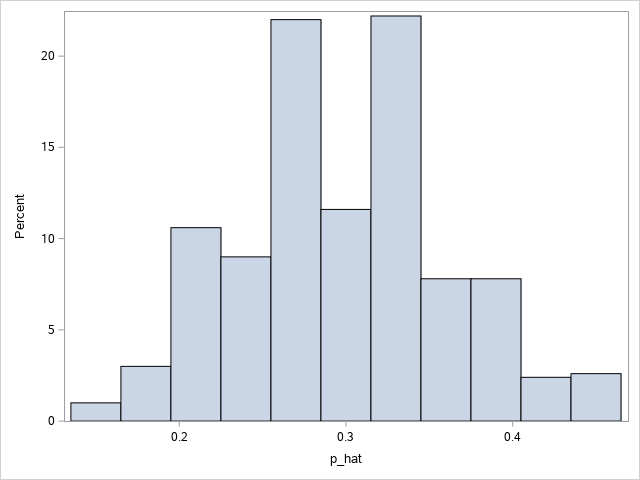

In [195]:
DATA sim;
   ARRAY data{*} x1-x50;
   DO numsim = 1 TO 500;
      DO n = 1 to 50;
         data(n) = ranbin(1234, 1, 0.3);
      END;
      p_hat = mean(of x1-x50);
      OUTPUT;
   END;
RUN;

PROC SGPLOT data = sim;
   HISTOGRAM p_hat;
RUN;

PROC MEANS data = sim mean std;
   VAR p_hat;
RUN;